In [ ]:
'''
import matplotlib.pyplot as plt
import numpy as np
import json
trial_name1 = '3000kms200kyr/'
trial_name2 = '3000kms2Myr/'
trial_name3 = '3000kms200Myr/'
with open('./Text/Cluster/'+trial_name1+'time.txt', 'r') as times1:  
    t = json.load(times1)
with open('./Text/Cluster/'+trial_name1+'oldx.txt', 'r') as oldx1:
    oldx = json.load(oldx1)
with open('./Text/Cluster/'+trial_name1+'oldy.txt', 'r') as oldy1:
    oldy = json.load(oldy1)
    
with open('./Text/Cluster/'+trial_name1+'newx.txt', 'r') as newx1:
    newx = json.load(newx1)
with open('./Text/Cluster/'+trial_name1+'newy_.txt', 'r') as newy1:
    newy = json.load(newy1)

with open('./Text/Cluster/'+trial_name1+'lr1.txt', 'r') as lagr1:  
    lr1 = json.load(lagr1)
with open('./Text/Cluster/'+trial_name1+'lr2.txt', 'r') as lagr2:  
    lr2 = json.load(lagr2)
with open('./Text/Cluster/'+trial_name1+'lr4.txt', 'r') as lagr4:  
    lr4 = json.load(lagr4) 
    
with open('./Text/Cluster/'+trial_name2+'newx.txt', 'r') as newx2:
    newx2 = json.load(newx2)
with open('./Text/Cluster/'+trial_name2+'newy_.txt', 'r') as newy2:
    newy2 = json.load(newy2)
with open('./Text/Cluster/'+trial_name2+'com.txt', 'r') as com2:
    com2 = json.load(com2)

    
#figure = plt.figure(figsize=(7,7))
#plt.rcParams.update({'font.size': 16})
#figure.add_subplot(1,1,1)
#ax = plt.gca()
#ax.minorticks_on()
#ax.locator_params(nbins=3)    

plt.figure()
plt.title('Before Interaction')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.scatter(oldx,oldy,s=1)
plt.show()

plt.figure()
plt.scatter(newx,newy,s=1)
plt.title('0.2 Myr After Interaction')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')

plt.show()

plt.figure()
plt.title('Lagrangian Radii Evolution')
plt.plot(t, lr1, label='mf 0.01')
plt.plot(t, lr2, label='mf 0.02')
plt.plot(t, lr4, label='mf 0.1')
plt.xlabel('Time (yr)')
plt.ylabel('Lagrangian Radii (pc)')
plt.legend()
plt.show()


plt.figure()
plt.title('2 Myr After Interaction')
plt.scatter(newx2,newy2,s=1)
plt.show()

with open('./Text/Cluster/'+trial_name2+'time.txt', 'r') as times2:  
    t2 = json.load(times2)
with open('./Text/Cluster/'+trial_name2+'lr1.txt', 'r') as lagr1_:  
    lr1 = json.load(lagr1_)
with open('./Text/Cluster/'+trial_name2+'lr2.txt', 'r') as lagr2_:  
    lr2 = json.load(lagr2_)
with open('./Text/Cluster/'+trial_name2+'lr4.txt', 'r') as lagr4_:  
    lr4 = json.load(lagr4_) 
plt.figure()
plt.plot(t2, lr1, label='mf 0.01')
plt.plot(t2, lr2, label='mf 0.02')
#plt.plot(t2, lr4, label='mf 0.1')
plt.xlabel('Time (yr)')
plt.ylabel('Lagrangian Radii (pc)')
plt.legend()
plt.show()

with open('./Text/Cluster/'+trial_name3+'newx.txt', 'r') as newx3:
    newx3 = json.load(newx3)
with open('./Text/Cluster/'+trial_name3+'newy_.txt', 'r') as newy3:
    newy3 = json.load(newy3)
plt.figure()
plt.title('200 Myr After Interaction')
plt.scatter(newx3,newy3,s=1)
#plt.xlim(-300000,300000)
#plt.ylim(-300000,300000)
plt.show()
'''

In [ ]:
'''from amuse.lab import *
import matplotlib.pyplot as plt
import json
with open('./Text/Cluster_Trials/test_particle_x.txt', 'r') as test_x:
    part_x = json.load(test_x)
with open('./Text/Cluster_Trials/test_particle_y.txt', 'r') as test_y:
    part_y = json.load(test_y)

pc1_start = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms200kyr_start.hdf5',format='hdf5')
pc1_200kyr = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms200kyr_end.hdf5',format='hdf5')
pc1_2Myr = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms2Myr_end.hdf5',format='hdf5')

pc6_start = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms200kyr_start.hdf5',format='hdf5')
pc6_200kyr = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms200kyr_end.hdf5',format='hdf5')

pc6_1Myr = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms1Myr_end.hdf5',format='hdf5')
pc6_2Myr = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms2Myr_end.hdf5',format='hdf5')
pc6_20Myr = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms20Myr_end.hdf5',format='hdf5')
#print cluster_set
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322,sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324,sharex=ax3, sharey=ax3)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326,sharex=ax5, sharey=ax5)
ax1.scatter(pc1_start.x.value_in(units.parsec), pc1_start.y.value_in(units.parsec),s=1)
ax2.scatter(pc6_start.x.value_in(units.parsec), pc6_start.y.value_in(units.parsec),s=1)

#ax3.set_ylim(-350,350)
#ax3.set_xlim(-350,350)
ax3.scatter(pc1_200kyr.x.value_in(units.parsec), pc1_200kyr.y.value_in(units.parsec),s=1)
ax3.scatter(pc1_start.x.value_in(units.parsec), pc1_start.y.value_in(units.parsec),s=1)
ax3.plot(part_x, part_y,color='r')
ax4.scatter(pc6_200kyr.x.value_in(units.parsec), pc6_200kyr.y.value_in(units.parsec),s=1)
ax4.scatter(pc6_start.x.value_in(units.parsec), pc6_start.y.value_in(units.parsec),s=1)

ax5.scatter(pc1_2Myr.x.value_in(units.parsec), pc1_2Myr.y.value_in(units.parsec),s=1)
ax6.scatter(pc6_2Myr.x.value_in(units.parsec), pc6_2Myr.y.value_in(units.parsec),s=1)
ax5.scatter(pc1_200kyr.x.value_in(units.parsec), pc1_200kyr.y.value_in(units.parsec),s=1)
ax6.scatter(pc6_200kyr.x.value_in(units.parsec), pc6_200kyr.y.value_in(units.parsec),s=1)
plt.xlabel('x')
plt.show()
'''

In [ ]:
'''pc6_start_slow = read_set_from_file('./Text/Cluster_Trials/6pc/2300kms200kyr_start.hdf5',format='hdf5')
pc6_200kyr_slow = read_set_from_file('./Text/Cluster_Trials/6pc/2300kms200kyr_end.hdf5',format='hdf5')
pc6_1Myr_slow = read_set_from_file('./Text/Cluster_Trials/6pc/2300kms1Myr_end.hdf5',format='hdf5')
pc6_2Myr_slow = read_set_from_file('./Text/Cluster_Trials/6pc/2300kms2Myr_end.hdf5',format='hdf5')
pc6_20Myr_slow = read_set_from_file('./Text/Cluster_Trials/6pc/2300kms20Myr_end.hdf5',format='hdf5')

ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422,sharex=ax1, sharey=ax1)
ax1.set_ylim(-5000,5000)
ax1.set_xlim(-5000,5000)

ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424,sharex=ax3, sharey=ax3)
ax3.set_ylim(-5000,5000)
ax3.set_xlim(-5000,5000)

ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426,sharex=ax5, sharey=ax5)
ax5.set_ylim(-5000,5000)
ax5.set_xlim(-5000,5000)

ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428,sharex=ax7, sharey=ax7)
ax7.set_ylim(-50000,50000)
ax7.set_xlim(-50000,50000)
ax1.scatter(pc6_200kyr.x.value_in(units.parsec), pc6_200kyr.y.value_in(units.parsec),s=1)
ax2.scatter(pc6_200kyr_slow.x.value_in(units.parsec), pc6_200kyr_slow.y.value_in(units.parsec),s=1)
ax3.scatter(pc6_1Myr.x.value_in(units.parsec), pc6_1Myr.y.value_in(units.parsec),s=1)
ax4.scatter(pc6_1Myr_slow.x.value_in(units.parsec), pc6_1Myr_slow.y.value_in(units.parsec),s=1)
ax5.scatter(pc6_2Myr.x.value_in(units.parsec), pc6_2Myr.y.value_in(units.parsec),s=1)
ax6.scatter(pc6_2Myr_slow.x.value_in(units.parsec), pc6_2Myr_slow.y.value_in(units.parsec),s=1)
ax7.scatter(pc6_20Myr.x.value_in(units.parsec), pc6_20Myr.y.value_in(units.parsec),s=1)
ax8.scatter(pc6_20Myr_slow.x.value_in(units.parsec), pc6_20Myr_slow.y.value_in(units.parsec),s=1)
plt.suptitle('6pc')
plt.show()
'''


-9.71174874326
-17.2673789692


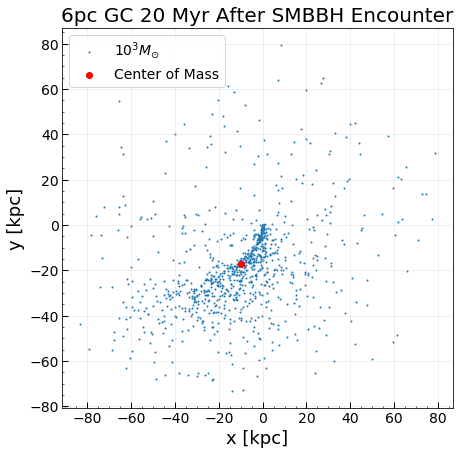

In [14]:
from amuse.lab import *
import matplotlib
import matplotlib.pyplot as plt
import json
pc6_20Myr = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms20Myr_end.hdf5',format='hdf5')
image_name = '6pc20Myr_scatter.png'
save_file = './Images/' + image_name
fig = plt.figure(figsize=(7,7))
params = {'axes.labelsize': 18,
          'axes.titlesize':20, 
          'font.size': 14, 
          'legend.fontsize': 14, 
          'xtick.labelsize': 14, 
          'ytick.labelsize': 14
         }
matplotlib.rcParams.update(params)
plt.plot(-9.71174874326, -17.2673789692)
plt.scatter(pc6_20Myr.x.value_in(units.parsec)/1000, 
            pc6_20Myr.y.value_in(units.parsec)/1000,
            s=1,
            label='$10^3 M_{\odot}$'
           )

plt.scatter(pc6_20Myr.center_of_mass().x.value_in(units.parsec)/1000,
           pc6_20Myr.center_of_mass().y.value_in(units.parsec)/1000,
            color='r',
            marker='o',
            label='Center of Mass'
           )
print pc6_20Myr.center_of_mass().x.value_in(units.parsec)/1000
print pc6_20Myr.center_of_mass().y.value_in(units.parsec)/1000
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(size = 6, width = 1, direction='in')
plt.grid(alpha=0.25)
#plt.xlim(-90,90)
#plt.ylim(-90,90)
plt.legend()
plt.title('6pc GC 20 Myr After SMBBH Encounter')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')


plt.savefig(save_file)
plt.show()

3.63794217722
-10.9445360979


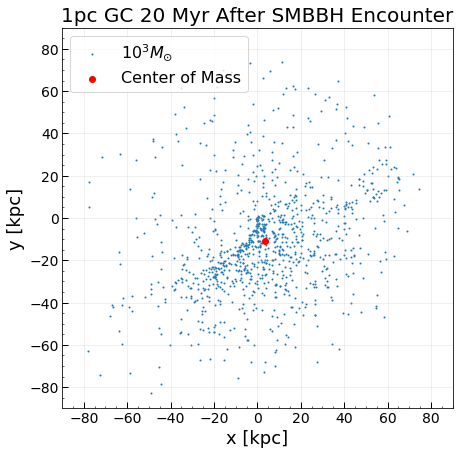

In [15]:
pc1_20Myr = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms20Myr_end.hdf5',format='hdf5')
image_name = '1pc20Myr_scatter.png'
save_file = './Images/' + image_name
fig = plt.figure(figsize=(7,7))
params = {'axes.labelsize': 18,
          'axes.titlesize':20, 
          'text.fontsize': 14, 
          'legend.fontsize': 16, 
          'xtick.labelsize': 14, 
          'ytick.labelsize': 14
         }
matplotlib.rcParams.update(params)
print pc1_20Myr.center_of_mass().x.value_in(units.parsec)/1000
print pc1_20Myr.center_of_mass().y.value_in(units.parsec)/1000
plt.scatter(pc1_20Myr.x.value_in(units.parsec)/1000, 
            pc1_20Myr.y.value_in(units.parsec)/1000,
            s=1,
            label='$10^3 M_{\odot}$'
           )
plt.scatter(pc1_20Myr.center_of_mass().x.value_in(units.parsec)/1000,
           pc1_20Myr.center_of_mass().y.value_in(units.parsec)/1000,
            color='r',
            marker='o',
            label='Center of Mass'
           )
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(size = 6, width = 1, direction='in')
plt.grid(alpha=0.25)
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.legend()
plt.title('1pc GC 20 Myr After SMBBH Encounter')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')

plt.savefig(save_file)
plt.show()